In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Aim is to predict the marks of students of the test data

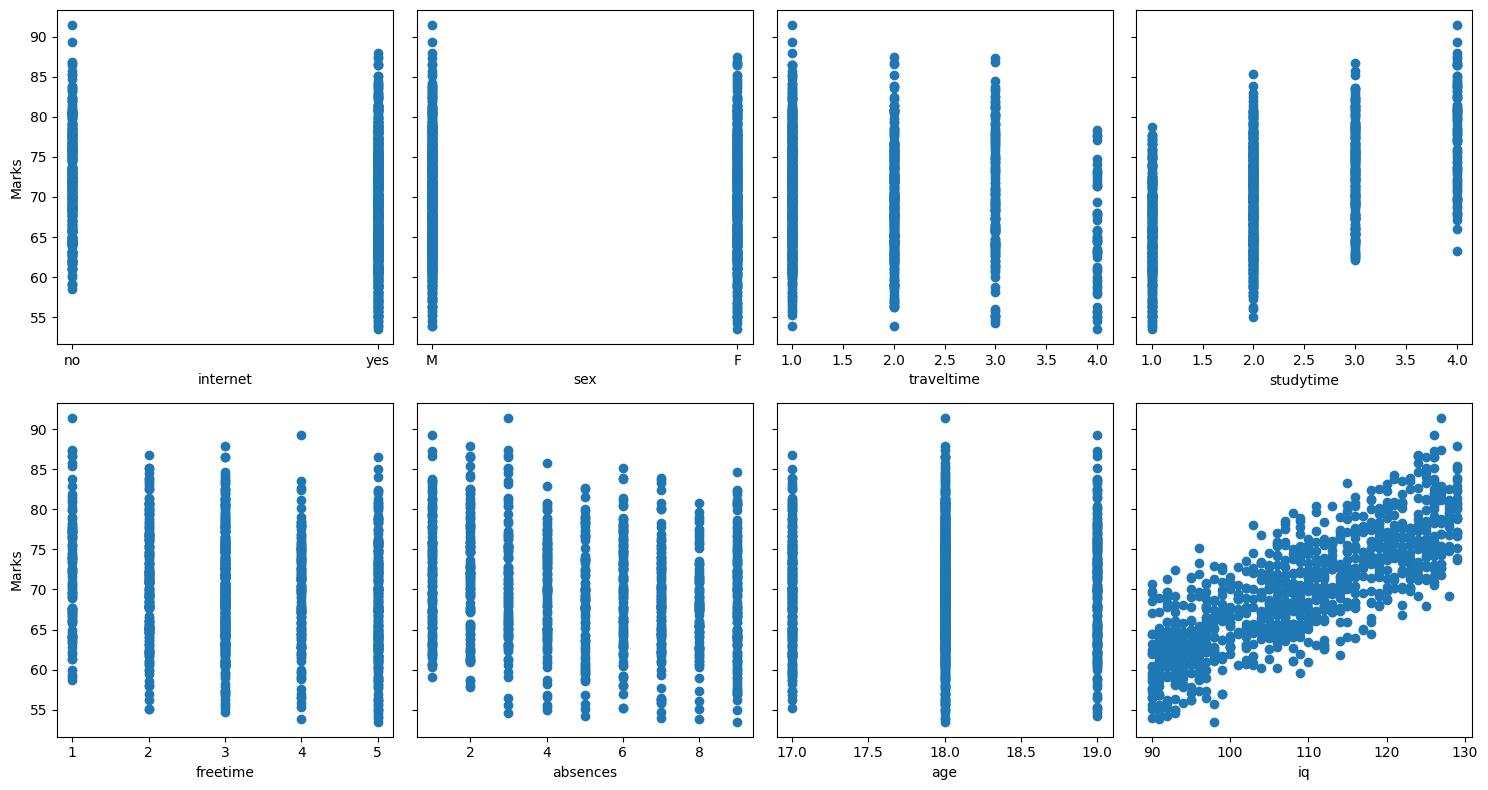

In [2]:
# Use the file namd 'training data' to train the model

data = pd.read_excel('Training data.xlsx')
x_train = np.array(data.iloc[:,0:8])
y_train = np.array(data.iloc[:,8]).reshape(-1,1)

# Try plotting y_train with different features
# To get an idea whether to add some features or not
# Add some features if required in x_train
x_features = ['internet','sex','traveltime','studytime','freetime','absences','age','iq']
fig,ax=plt.subplots(2, 4, figsize=(15, 8), sharey=True)
for i in range(x_train.shape[1]):
    row = i // 4
    col = i % 4
    ax[row, col].scatter(x_train[:, i], y_train)
    ax[row, col].set_xlabel(x_features[i])
    if col == 0:
        ax[row, col].set_ylabel("Marks")

plt.tight_layout()
plt.show()

# Also do label encoding for features not represented in numbers
# refer the link if not know : https://youtu.be/589nCGeWG1w?si=t2Wa7LgbUOO4RooM

def feature_changing(x_train):

    from sklearn.preprocessing import LabelEncoder
    label_encoder = LabelEncoder()
    x_train[:, 0] = label_encoder.fit_transform(x_train[:, 0])
    x_train[:, 1] = label_encoder.fit_transform(x_train[:, 1])

    return x_train


x_train = feature_changing(x_train)

In [3]:
def z_score(x_train):

  # ---------
    # write the code for feature scaling here
    # Your code here
  # ---------
    x_mean = np.mean(x_train, axis=0)
    x_std = np.std(x_train, axis=0)
    x_train = (x_train-x_mean)/x_std

    return x_train,x_std,x_mean

In [4]:
def cost(x_train,y_train,w,b):

  # ---------
    # Your code here
    # Use mean square error as cost function
    # return cost
  # ---------
    cost=0.0
    m = x_train.shape[0]

    for i in range(m):
      f_wb = np.dot(x_train[i], w)+b
      cost += (f_wb - y_train[i])**2


    return cost

In [5]:
def gradient_descent(x_train, y_train, w, b, learning_rate=0.01, iterations=1000):
    m = x_train.shape[0]
    for i in range(iterations):
        f_wb = np.dot(x_train, w) + b
        error = f_wb - y_train
        w -= learning_rate * np.dot(x_train.T, error) / m
        b -= learning_rate * np.sum(error) / m
    return w, b

In [6]:
x_train = x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)

old_cost = 0
alpha =0.001
num_iters = 10000
while abs(old_cost - cost(x_train,y_train,w,b))>0.00001:
  old_cost = cost(x_train,y_train,w,b)
  w,b = gradient_descent(x_train,y_train,w,b)

x_predict = pd.read_excel('Test data.xlsx').iloc[:,:8].to_numpy()
x_predict = feature_changing(x_predict)
x_predict = (x_predict - x_mean)/x_std
ans = pd.read_excel('Test data.xlsx').iloc[:,8].to_numpy()

y_predict = (np.dot(x_predict,w) + b)
print( y_predict)

accuracy = 0
for dim in range(len(ans)):
  if abs(y_predict[dim]-ans[dim])<0.5: # do not change the tolerance as you'll be checked on +- 0.5 error only
    accuracy += 1
accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

[[74.59640421265156]
 [65.28516835775477]
 [79.23663302145518]
 [62.65770936684742]
 [67.82597738449876]
 [75.4265430237708]
 [77.05747123817885]
 [75.94546636872349]
 [72.51067953089432]
 [71.60558554426763]
 [65.03807034530905]
 [59.085990872898584]
 [70.00643935756824]
 [59.06245940012917]
 [70.12080666739018]
 [74.38731653567376]
 [57.707283754440624]
 [79.3369680671484]
 [57.53270518010684]
 [60.873969661937906]
 [74.70237919157846]
 [63.70575002233859]
 [79.42120072431369]
 [64.51612192976589]
 [79.51591220027431]
 [85.40601278786762]
 [68.13677837229024]
 [68.27723571673474]
 [62.30776569045931]
 [82.2553700593843]
 [61.25162447076215]
 [69.06280177695108]
 [78.41074698725392]
 [75.79569351009457]
 [80.1071903780427]
 [69.74018793914638]
 [77.03521502473123]
 [75.3999491400457]
 [78.28640207392084]
 [68.64124968977816]
 [69.31678541828863]
 [61.76610981035161]
 [77.70250000558362]
 [74.52525094658678]
 [67.63781912555508]
 [64.55760441809302]
 [66.14138475670816]
 [71.9145345790